<a href="https://colab.research.google.com/github/siri2511/Deep-Learning/blob/main/Features_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset size:20640 samples,8 features
features:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable(class labels): Median house value

Dataset statistics before adding outliers:
                  0
count  20640.000000
mean       2.068558
std        1.153956
min        0.149990
25%        1.196000
50%        1.797000
75%        2.647250
max        5.000010

First 10 samples before adding outliers:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.9388 - val_loss: 1.7055
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4252 - val_loss: 1.6169
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3787 - val_loss: 1.5901
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4163 - val_loss: 1.5645
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3543 - val_loss: 1.5597
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3401 - val_loss: 1.5592
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3236 - val_loss: 1.5334
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3196 - val_loss: 1.5386
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3202 - val_loss: 1.5209
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3018 - val_loss: 1.5262
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3120 - val_loss: 1.5183
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

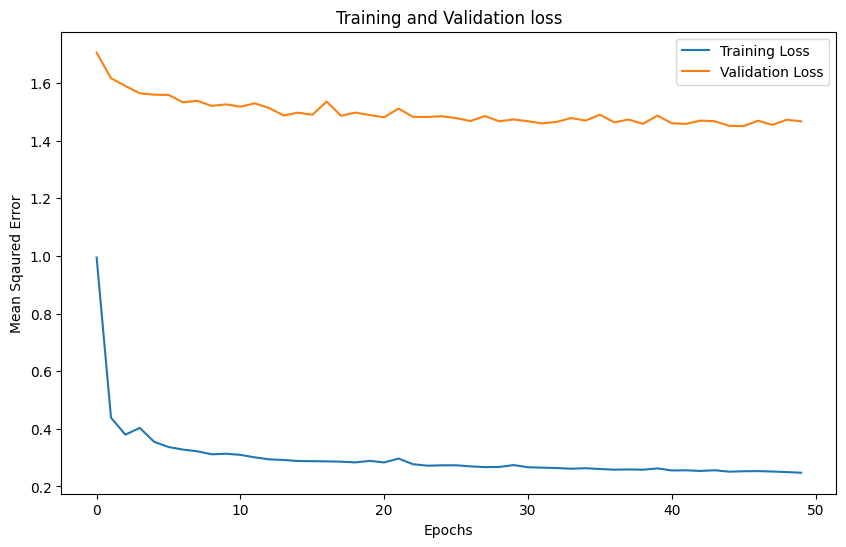

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


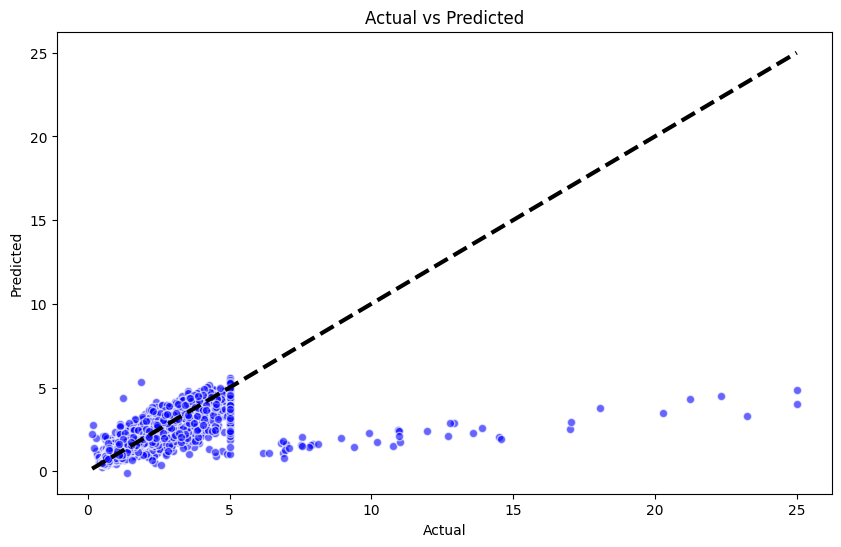

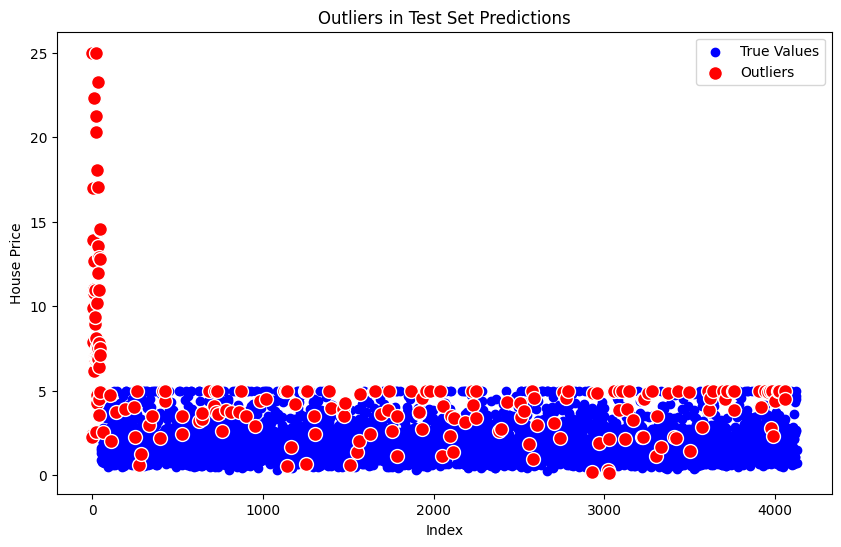

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#load the california housing dataset
data=fetch_california_housing()
x,y=data.data,data.target
#display the dataset size and features
print(f"Dataset size:{x.shape[0]} samples,{x.shape[1]} features")
print(f"features:{data.feature_names}")
print(f"Target variable(class labels): Median house value\n")
#display dataset statistics before adding outliers
print("Dataset statistics before adding outliers:")
print(pd.DataFrame(y).describe())
#display the first 10 samples before adding outliers
print("\nFirst 10 samples before adding outliers:")
print(pd.DataFrame(x,columns=data.feature_names).head(10))
print("Corresponding target values")
print(y[:10])
#randomly select indices to add outliers
np.random.seed(42)
n_outliers=50
indices=np.random.choice(np.arange(len(y)),n_outliers,replace=False)
#display the target values atr these indices before adding outliers
print("\nTarget value at selected indices before adding outliers")
print(y[indices])
#add outliers by inflating the selected target values
y[indices]*=5
#display the target values at these indices after adding outliers
print("\nTarget values at selected indices after adding outliers:")
print(y[indices])
#display dataset statistics after adding outliers
print("\nDataset statistics after adding outliers:")
print(pd.DataFrame(y).describe())
#dislay the first 10 samples after adding outliers
print("\nFirst 10 samples after adding outliers(Features remain unchanged):")
print(pd.DataFrame(x,columns=data.feature_names).head(10))
print("Corresponding target values after adding outliers")
print(y[:10])
#split the dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#standardize the dataset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#build the neural network model
model=models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)
    ])
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
#train the model
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))
#plot the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Sqaured Error')
plt.legend()
plt.show()
#make predictions on the test set
y_pred=model.predict(X_test)
#visualize the predictions vs actual target
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,c='blue',marker='o',edgecolor='w',alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
##identify potential outliers in the predictions
errors=np.abs(y_test-y_pred.flatten())
outlier_threshold=np.percentile(errors,95)
outliers=np.where(errors>outlier_threshold)
#plot the outliers
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(y_test)),y_test,c='blue',label='True Values')
plt.scatter(outliers,y_test[outliers],c='red',label='Outliers',edgecolor='w',s=100)
plt.title('Outliers in Test Set Predictions')
plt.xlabel('Index')
plt.ylabel('House Price')
plt.legend()
plt.show()
